In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

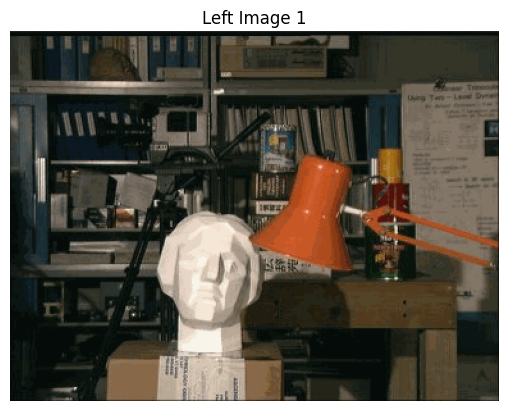

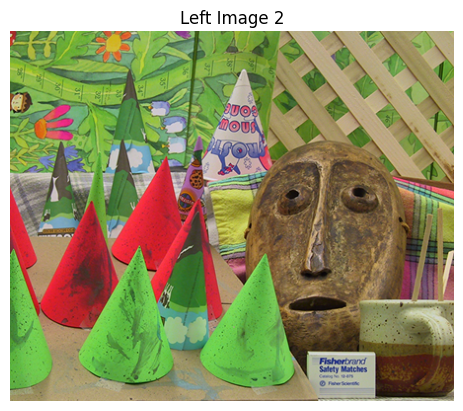

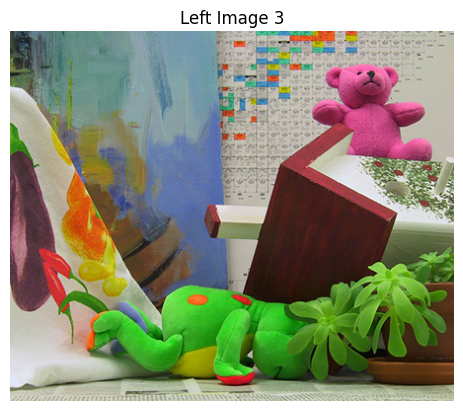

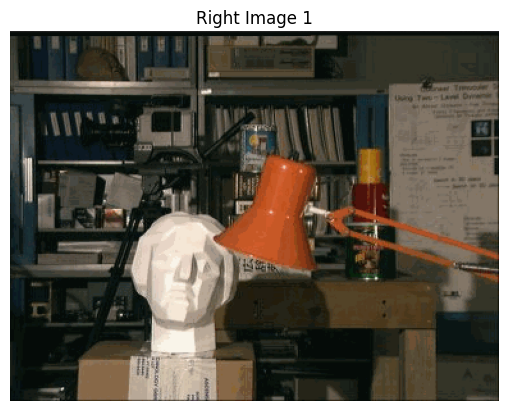

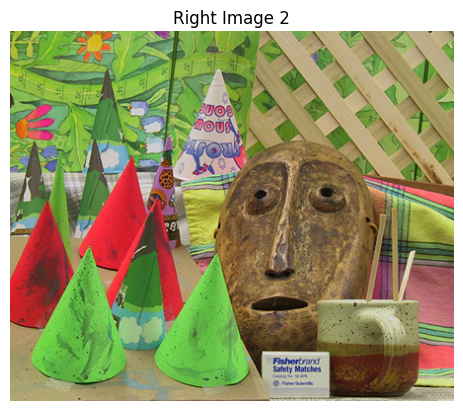

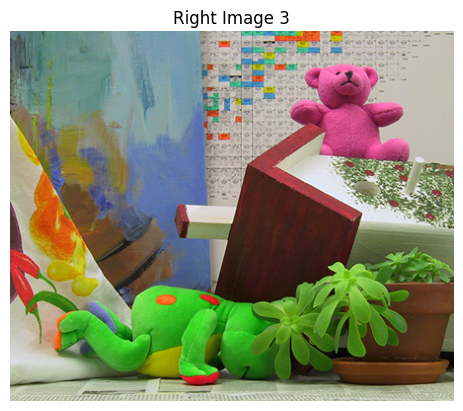

In [2]:
image_path1 = os.path.join("..", "stereo_materials", "l1.png")
image_path2 = os.path.join("..", "stereo_materials", "l2.png")
image_path3 = os.path.join("..", "stereo_materials", "l3.png")
image_path4 = os.path.join("..", "stereo_materials", "r1.png")
image_path5 = os.path.join("..", "stereo_materials", "r2.png")
image_path6 = os.path.join("..", "stereo_materials", "r3.png")
left1 = cv2.imread(image_path1)
left2 = cv2.imread(image_path2)
left3 = cv2.imread(image_path3)
right1 = cv2.imread(image_path4)
right2 = cv2.imread(image_path5)
right3 = cv2.imread(image_path6)

def show_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(left1, "Left Image 1")
show_image(left2, "Left Image 2")
show_image(left3, "Left Image 3")
show_image(right1, "Right Image 1") 
show_image(right2, "Right Image 2")
show_image(right3, "Right Image 3")

In [3]:
def convert_to_grayscale(image):
    """Convert a given image to grayscale."""
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
left1_grayscale = convert_to_grayscale(left1)
left2_grayscale = convert_to_grayscale(left2)
left3_grayscale = convert_to_grayscale(left3)
right1_grayscale = convert_to_grayscale(right1)
right2_grayscale = convert_to_grayscale(right2)
right3_grayscale = convert_to_grayscale(right3)

In [6]:
def block_matching_SAD(left_image,right_image,max_disparity,window_size):
    left_height, left_width=left_image.shape
    disparity_map=np.zeros((left_height,left_width),dtype=np.uint8) # create a blanck disparity map
    half_width=window_size//2 # so we can use centered windows

    # iterative over pixels ( to be within the bounds)
    
    for y in range(half_width, left_height - half_width):
        for x in range(half_width, left_width - half_width):
            best_offset = 0
            min_cost = float('inf')

            left_patch = left_image[y - half_width:y + half_width + 1, x - half_width:x + half_width + 1]

            # test different disparity values and skip if it goes out of bound
            for d in range(0, max_disparity):
                x_right = x - d
                if x_right - half_width < 0:
                    continue

                right_patch = right_image[y - half_width:y + half_width + 1, x_right - half_width:x_right + half_width + 1]
                cost = np.sum(np.abs(left_patch - right_patch))  # SAD cost

                # finding the best match
                if cost < min_cost:
                    min_cost = cost
                    best_offset = d

            # convert teh diparity to grayscale value for visual
            disparity_map[y, x] = int(best_offset * (255 / max_disparity))

    return disparity_map

In [9]:
def block_matching_SSD(left_image, right_image, max_disparity, window_size):
    left_height, left_width = left_image.shape
    disparity_map = np.zeros((left_height, left_width), dtype=np.uint8)
    half_width = window_size // 2

    for y in range(half_width, left_height - half_width):
        for x in range(half_width, left_width - half_width):
            best_offset = 0
            min_cost = float('inf')
            left_patch = left_image[y - half_width:y + half_width + 1, x - half_width:x + half_width + 1]

            for d in range(0, max_disparity):
                x_right = x - d
                if x_right - half_width < 0:
                    continue

                right_patch = right_image[y - half_width:y + half_width + 1, x_right - half_width:x_right + half_width + 1]
                cost = np.sum((left_patch - right_patch) ** 2)  # SSD cost

                if cost < min_cost:
                    min_cost = cost
                    best_offset = d

            disparity_map[y, x] = int(best_offset * (255 / max_disparity))

    return disparity_map


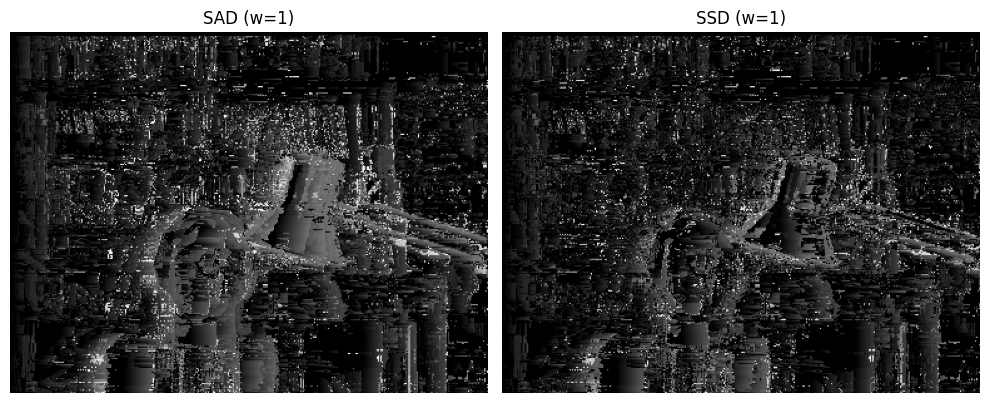

KeyboardInterrupt: 

In [10]:
# Disparity settings
max_disparity = 64
window_sizes = [1, 5, 9]

for w in window_sizes:
    disp_sad = block_matching_SAD(left1_grayscale, right1_grayscale, max_disparity, w)
    disp_ssd = block_matching_SSD(left1_grayscale, right1_grayscale, max_disparity, w)

    # Save the maps
    cv2.imwrite(f'disparity_sad_w{w}.png', disp_sad)
    cv2.imwrite(f'disparity_ssd_w{w}.png', disp_ssd)

    # Show the results
    plt.figure(figsize=(10,4))

    plt.subplot(1, 2, 1)
    plt.title(f'SAD (w={w})')
    plt.imshow(disp_sad, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f'SSD (w={w})')
    plt.imshow(disp_ssd, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
